In [10]:
from sklearn.datasets import fetch_openml

In [11]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

d:\softwares\anaconda\envs\myda_env\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [12]:
mask = (y == 3) | (y == 5)
X_35 = X[mask]
y_35 = y[mask]

In [13]:
y_binary = (y_35 == 5).astype(int)

In [20]:
digit_3 = [i.reshape(28,28) for i in X_35[y_35==3]]
digit_5 = [i.reshape(28,28) for i in X_35[y_35==5]]

In [42]:
print("Number of images of 3",len(digit_3))
print("Number of images of 5",len(digit_5))

Number of images of 3 7141
Number of images of 5 6313


(-0.5, 27.5, 27.5, -0.5)

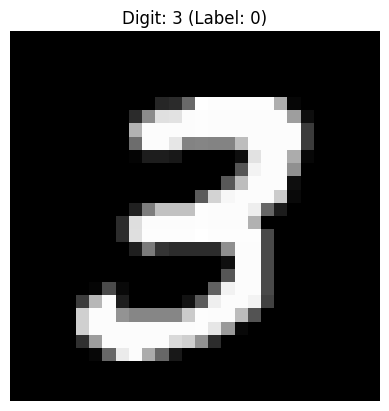

In [23]:
import matplotlib.pyplot as plt
plt.imshow(digit_3[0], cmap='gray')
plt.title("Digit: 3 (Label: 0)")
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

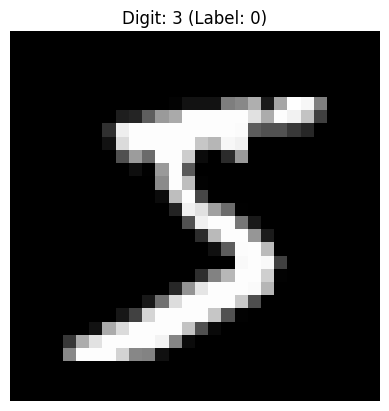

In [24]:
import matplotlib.pyplot as plt
plt.imshow(digit_5[0], cmap='gray')
plt.title("Digit: 3 (Label: 0)")
plt.axis('off')

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_35, y_binary, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

d:\softwares\anaconda\envs\myda_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1453
           1       0.95      0.95      0.95      1238

    accuracy                           0.95      2691
   macro avg       0.95      0.95      0.95      2691
weighted avg       0.95      0.95      0.95      2691



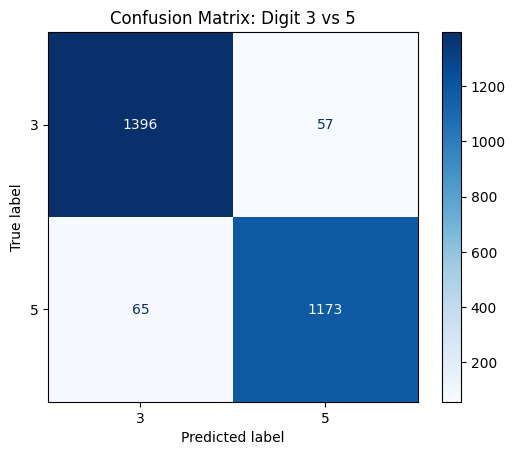

In [36]:
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[3, 5])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Digit 3 vs 5")
plt.show()

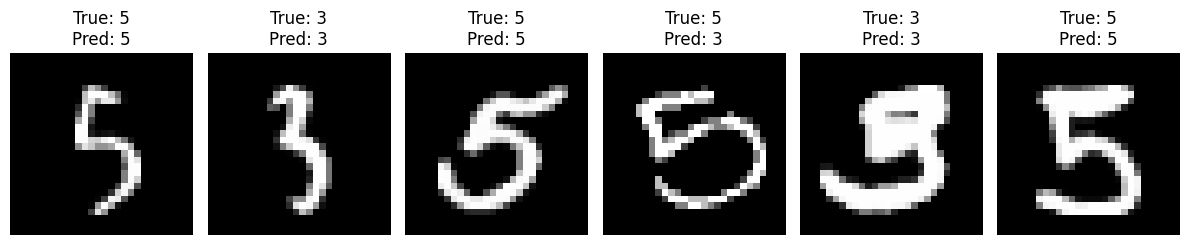

In [37]:
import matplotlib.pyplot as plt
label_map = {0: 3, 1: 5}
num_samples = 6

plt.figure(figsize=(12, 4))

for i in range(num_samples):
    img = X_test[i].reshape(28, 28)
    true_digit = label_map[y_test[i]]
    pred_digit = label_map[y_pred[i]]

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_digit}\nPred: {pred_digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()